# Buffer Events Propensity Model
### // Predicting buffering from player session events

# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import mglearn as mglearn
import mglearn.plots
import mglearn.datasets
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
from IPython.display import display
import seaborn as sns
import os

# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# Import Data and Explore

In [3]:
# Import Data Set - Predict Buffer
predbuff = pd.read_csv('C:/Users/kpfeif200/OneDrive - Comcast/VI Admin/SJU/DSS 740 Analytics w Machine Learning/Module 8 Final Project/PredictBufferv4_edit3.csv')

display(predbuff.head())

,buff_flg,sess_min,app_nm_ncd,dev_nm,num_pbs,hm_ncd,btrt_chg,bfst_str,bfst_stp,pst_chg,...,astyp_eas,astyp_gen,astcl_lin,astcl_vd,astcl_dvr,astcl_eas,pbt_st,pbt_lcl,rgcl_tve,rgcl_tsx
0,1,242,1,Andrd_dev,3.0,-1,1,1,1,1,...,0,1,0,1,0,0,1,0,1,0
1,0,0,1,Andrd_dev,0.0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,Andrd_dev,0.0,-1,1,1,1,1,...,0,1,0,1,0,0,1,0,1,0
3,1,1,1,Andrd_dev,0.0,-1,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
4,1,1,1,Andrd_dev,0.0,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1


In [4]:
# Data Columns
print("Features:\n", list(predbuff.columns), "\n")

# Data Types
predbuff.dtypes

Features:
 ['buff_flg', 'sess_min', 'app_nm_ncd', 'dev_nm', 'num_pbs', 'hm_ncd', 'btrt_chg', 'bfst_str', 'bfst_stp', 'pst_chg', 'pbst', 'hbt', 'eas_f', 'eas', 'mdnd', 'mdfl', 'mdop', 'mdop2', 'mdpf', 'astyp_pd', 'astyp_st', 'astyp_dvr', 'astyp_eas', 'astyp_gen', 'astcl_lin', 'astcl_vd', 'astcl_dvr', 'astcl_eas', 'pbt_st', 'pbt_lcl', 'rgcl_tve', 'rgcl_tsx'] 



buff_flg        int64
sess_min        int64
app_nm_ncd      int64
dev_nm         object
num_pbs       float64
hm_ncd          int64
btrt_chg        int64
bfst_str        int64
bfst_stp        int64
pst_chg         int64
pbst            int64
hbt             int64
eas_f           int64
eas             int64
mdnd            int64
mdfl            int64
mdop            int64
mdop2           int64
mdpf            int64
astyp_pd        int64
astyp_st        int64
astyp_dvr       int64
astyp_eas       int64
astyp_gen       int64
astcl_lin       int64
astcl_vd        int64
astcl_dvr       int64
astcl_eas       int64
pbt_st          int64
pbt_lcl         int64
rgcl_tve        int64
rgcl_tsx        int64
dtype: object

In [5]:
predbuff.dtypes.count()

32

In [6]:
predbuff.describe()

,buff_flg,sess_min,app_nm_ncd,num_pbs,hm_ncd,btrt_chg,bfst_str,bfst_stp,pst_chg,pbst,...,astyp_eas,astyp_gen,astcl_lin,astcl_vd,astcl_dvr,astcl_eas,pbt_st,pbt_lcl,rgcl_tve,rgcl_tsx
count,80000.000000,80000.000000,80000.000000,79973.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.418438,443.790212,2.618813,5.587561,0.209525,0.507062,0.470050,0.423450,0.629875,0.563425,...,0.000650,0.031425,0.555787,0.239712,0.094838,0.000650,0.887962,0.004825,0.332825,0.557575
std,0.493306,1016.987479,1.010778,18.927957,0.772015,0.499953,0.499105,0.494108,0.482841,0.495964,...,0.025487,0.174464,0.496881,0.426911,0.292992,0.025487,0.315415,0.069295,0.471227,0.496677
min,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,73.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,409.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,22964.000000,4.000000,1009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

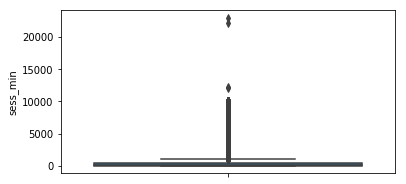

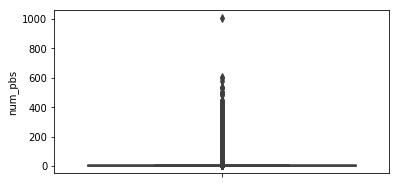

In [7]:
# Boxplots on factors with outliers from descriptive statistics review
plt.figure(figsize=(6,3))
sns.boxplot(y='sess_min',data=predbuff)
plt.plot

plt.figure(figsize=(6,3))
sns.boxplot(y='num_pbs',data=predbuff)
plt.plot

In [8]:
# Look for Nulls
predbuff.isna().sum()

buff_flg       0
sess_min       0
app_nm_ncd     0
dev_nm         0
num_pbs       27
hm_ncd         0
btrt_chg       0
bfst_str       0
bfst_stp       0
pst_chg        0
pbst           0
hbt            0
eas_f          0
eas            0
mdnd           0
mdfl           0
mdop           0
mdop2          0
mdpf           0
astyp_pd       0
astyp_st       0
astyp_dvr      0
astyp_eas      0
astyp_gen      0
astcl_lin      0
astcl_vd       0
astcl_dvr      0
astcl_eas      0
pbt_st         0
pbt_lcl        0
rgcl_tve       0
rgcl_tsx       0
dtype: int64

# Data Cleansing and Feature Engineering

In [9]:
# Impute clean nulls
predbuff[predbuff.isnull().any(axis=1)]

predbuff['num_pbs'].value_counts()

pb_fill = predbuff.fillna({'num_pbs': 0})

In [10]:
# Look for Nulls
pb_fill.isna().sum()

buff_flg      0
sess_min      0
app_nm_ncd    0
dev_nm        0
num_pbs       0
hm_ncd        0
btrt_chg      0
bfst_str      0
bfst_stp      0
pst_chg       0
pbst          0
hbt           0
eas_f         0
eas           0
mdnd          0
mdfl          0
mdop          0
mdop2         0
mdpf          0
astyp_pd      0
astyp_st      0
astyp_dvr     0
astyp_eas     0
astyp_gen     0
astcl_lin     0
astcl_vd      0
astcl_dvr     0
astcl_eas     0
pbt_st        0
pbt_lcl       0
rgcl_tve      0
rgcl_tsx      0
dtype: int64

### Categorical Variable Encoding

In [11]:
# Select only object columns in the dataframe
obj_pb = predbuff.select_dtypes(include=['object']).copy()
obj_pb.head()

,dev_nm
0,Andrd_dev
1,Andrd_dev
2,Andrd_dev
3,Andrd_dev
4,Andrd_dev


In [12]:
obj_pb['dev_nm'].value_counts()

Roku             20688
iPhone           16545
iPad             13091
Chrome           12477
Andrd_dev        10743
Safari            2786
Edge              2024
Firefox            779
IE                 758
iPod touch          61
Opera               43
Vivaldi              2
Mobile Safari        2
Yandex               1
Name: dev_nm, dtype: int64

In [13]:
# One-hot Encoded device names
dummy_devname = pd.get_dummies(obj_pb, columns=['dev_nm'])

In [14]:
dummy_devname.head()

,dev_nm_Andrd_dev,dev_nm_Chrome,dev_nm_Edge,dev_nm_Firefox,dev_nm_IE,dev_nm_Mobile Safari,dev_nm_Opera,dev_nm_Roku,dev_nm_Safari,dev_nm_Vivaldi,dev_nm_Yandex,dev_nm_iPad,dev_nm_iPhone,dev_nm_iPod touch
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Remove dev_nm with catigorical names from pb_fill
pb_fill_rmv = pb_fill.drop(['dev_nm'], axis=1)

# Concatenate clean predbuff fill (pb_fill) with encoded object predbuff (obj_pb)
pb_final = pd.concat([pb_fill_rmv, dummy_devname], axis=1)
pb_final.head()

,buff_flg,sess_min,app_nm_ncd,num_pbs,hm_ncd,btrt_chg,bfst_str,bfst_stp,pst_chg,pbst,...,dev_nm_IE,dev_nm_Mobile Safari,dev_nm_Opera,dev_nm_Roku,dev_nm_Safari,dev_nm_Vivaldi,dev_nm_Yandex,dev_nm_iPad,dev_nm_iPhone,dev_nm_iPod touch
0,1,242,1,3.0,-1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0.0,-1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0.0,-1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Feature selection (drop feature) with multicollinearity

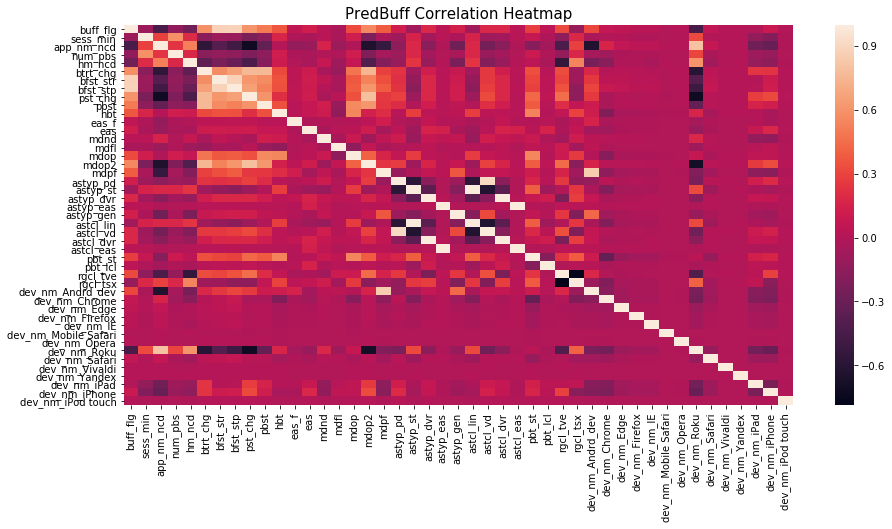

In [16]:
# Plot Correlation Heatmap
plt.figure(figsize=(15,7))
ax = plt.axes()
corr = pb_final.corr()
sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
ax.set_title('PredBuff Correlation Heatmap', fontsize=15)
plt.show()

# NOTE: astcl_vd+astyp_pd, astcl_lin+astyp_st, astcl_dvr+astyp_dvr, astcl_eas+astyp_eas
#       bfst_str+bfst_stp show a high correlation appearing to be above or about 0.9 on 
#       correlation heatmap

In [17]:
# Dropping highly correlated features for optimized analysis
pb_final.drop(['astyp_pd', 'astyp_st', 'astyp_dvr', 'astyp_eas', 'bfst_str', 'bfst_stp'], axis=1, inplace=True)
pb_final.head()

,buff_flg,sess_min,app_nm_ncd,num_pbs,hm_ncd,btrt_chg,pst_chg,pbst,hbt,eas_f,...,dev_nm_IE,dev_nm_Mobile Safari,dev_nm_Opera,dev_nm_Roku,dev_nm_Safari,dev_nm_Vivaldi,dev_nm_Yandex,dev_nm_iPad,dev_nm_iPhone,dev_nm_iPod touch
0,1,242,1,3.0,-1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0.0,-1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0.0,-1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Create X y, Split

In [18]:
# Create X and y

# X = Remove y from PredBuff 
X_pb = pb_final.drop(['buff_flg'], axis=1)

# y = Remove X from PredBuff by selecting the buffer_flag column
y_pb = pb_final['buff_flg']

# Applying Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X_pb, y_pb, random_state=321) #kept default 25/75%

In [19]:
X_pb.head()

,sess_min,app_nm_ncd,num_pbs,hm_ncd,btrt_chg,pst_chg,pbst,hbt,eas_f,eas,...,dev_nm_IE,dev_nm_Mobile Safari,dev_nm_Opera,dev_nm_Roku,dev_nm_Safari,dev_nm_Vivaldi,dev_nm_Yandex,dev_nm_iPad,dev_nm_iPhone,dev_nm_iPod touch
0,242,1,3.0,-1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0.0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0.0,-1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0.0,-1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_pb.columns

Index(['sess_min', 'app_nm_ncd', 'num_pbs', 'hm_ncd', 'btrt_chg', 'pst_chg',
       'pbst', 'hbt', 'eas_f', 'eas', 'mdnd', 'mdfl', 'mdop', 'mdop2', 'mdpf',
       'astyp_gen', 'astcl_lin', 'astcl_vd', 'astcl_dvr', 'astcl_eas',
       'pbt_st', 'pbt_lcl', 'rgcl_tve', 'rgcl_tsx', 'dev_nm_Andrd_dev',
       'dev_nm_Chrome', 'dev_nm_Edge', 'dev_nm_Firefox', 'dev_nm_IE',
       'dev_nm_Mobile Safari', 'dev_nm_Opera', 'dev_nm_Roku', 'dev_nm_Safari',
       'dev_nm_Vivaldi', 'dev_nm_Yandex', 'dev_nm_iPad', 'dev_nm_iPhone',
       'dev_nm_iPod touch'],
      dtype='object')

# Model 1 - Logistic Regression Model

In [21]:
# Applying Logistic Regression
logreg_pb = LogisticRegression(C=1.0, random_state=321)
logreg_pb.fit(X_train, y_train)

print("Logistic Regression train score: {:.3f}".format(logreg_pb.score(X_train, y_train)))
print("Logistic Regression test score: {:.3f}".format(logreg_pb.score(X_test, y_test)))

# NOTE: Started with basic model with default parameters to get a baseline. Test score is 
#       just about equal to train score and indicates a good baseline mode. (If test was
#       much higher than train, we would be overfitting)

# NOTE: Using .score as a measure of accuracy through this project as it internally calculates 
#       Y'=predictor.predict(X) and then compares Y' against Y to give an accuracy measure.
#       logreg.score(Xtrain,Ytrain) is measuring the accuracy of the model against the training data.
#       logreg.score(Xtest,Ytest) is measuring the accuracy of the model against the test data.

Logistic Regression train score: 0.858
Logistic Regression test score: 0.859


In [22]:
# Using Stratified K-fold cross-validation for classification

kfold = KFold(n_splits=10, shuffle=True, random_state=321)
scores_1 = cross_val_score(logreg_pb, X_pb, y_pb, cv=kfold)
print("Cross-validation scores 1: \n{}".format(scores_1))

kfold = KFold(n_splits=20, shuffle=True, random_state=123)
scores_2 = cross_val_score(logreg_pb,  X_pb, y_pb, cv=kfold)
print("Cross-validation scores 2: \n{}".format(scores_2))

kfold = KFold(n_splits=50, shuffle=True, random_state=323)
scores_3 = cross_val_score(logreg_pb,  X_pb, y_pb, cv=kfold)
print("Cross-validation scores 3: \n{}".format(scores_3))


Cross-validation scores 1: 
[0.860125 0.858875 0.854125 0.852    0.849625 0.857625 0.85725  0.852625
 0.855125 0.857875]
Cross-validation scores 2: 
[0.85    0.86425 0.83075 0.86025 0.8545  0.863   0.853   0.85275 0.85725
 0.856   0.85575 0.85375 0.855   0.86    0.86025 0.85325 0.8545  0.84925
 0.8535  0.8635 ]
Cross-validation scores 3: 
[0.86125  0.85     0.853125 0.843125 0.85875  0.848125 0.863125 0.858125
 0.85875  0.864375 0.849375 0.8725   0.8625   0.84     0.8725   0.859375
 0.841875 0.858125 0.855    0.851875 0.851875 0.85125  0.8575   0.8525
 0.848125 0.885625 0.848125 0.86125  0.85375  0.861875 0.8575   0.8675
 0.848125 0.865625 0.866875 0.859375 0.84875  0.86625  0.8425   0.84375
 0.851875 0.861875 0.83875  0.858125 0.84125  0.83625  0.845    0.84875
 0.84375  0.869375]


In [23]:
print("Cross-validation scores 1 average: {:.3f}".format(np.average(scores_1)))
print("Cross-validation scores 2 average: {:.3f}".format(np.average(scores_2)))
print("Cross-validation scores 3 average: {:.3f}".format(np.average(scores_3)))

# NOTE: Reviewing 25% split vs. K-fold Cross-validaiton we see the 
#       same scores and validate the logistic regression model performance

Cross-validation scores 1 average: 0.856
Cross-validation scores 2 average: 0.855
Cross-validation scores 3 average: 0.855


# Model 2 - Random Forest Classifier

In [24]:
# Apply Random Forest Classifier model

# Random Forest with additional n_estimators
rf = RandomForestClassifier(n_estimators=100, random_state=321)
rf.fit(X_train, y_train)

print("Random Forest Classifier train score: {:.3f}".format(rf.score(X_train, y_train)))
print("Random Forest Classifier test score: {:.3f}".format(rf.score(X_test, y_test)))


# Random forest with max depth adjusted
rf = RandomForestClassifier(n_estimators=150, random_state=321, max_depth=4,)
rf.fit(X_train, y_train)

print("\nRandom Forest Classifier train score: {:.3f}".format(rf.score(X_train, y_train)))
print("Random Forest Classifier test score: {:.3f}".format(rf.score(X_test, y_test)))


# NOTE: First hyperparameter choices show that likely the model is overtraining. Some improvement 
#       on fit when adjusting Max depth, tried different values until closest fit in second tuning, 
#       was made with test slghtly higher than train. (If test was much lower than train we would 
#       be underfitting.)

Random Forest Classifier train score: 0.951
Random Forest Classifier test score: 0.876

Random Forest Classifier train score: 0.849
Random Forest Classifier test score: 0.851


AUC: 0.941


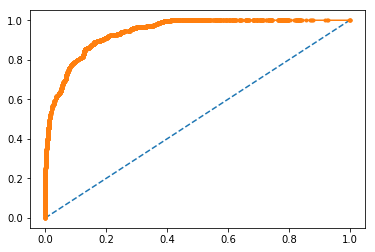

In [25]:
# Apply AUC metric from ROC curves
rf.fit(X_train, y_train)
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# NOTE: This looks at first to be a very strong model but likely is overfitting as it is too perfect

### Feature Importance

In [26]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feat_imp_plt = feature_importances.round({"importance":3})

feat_imp_plt['index'] = feat_imp_plt.index
feat_imp_plt

# NOTE: Feature importance indicates that in terms of relative weight the variables are balanced

,importance,index
pst_chg,0.148,pst_chg
btrt_chg,0.145,btrt_chg
mdop2,0.108,mdop2
app_nm_ncd,0.096,app_nm_ncd
pbst,0.090,pbst
dev_nm_Roku,0.083,dev_nm_Roku
hbt,0.078,hbt
mdop,0.058,mdop
mdpf,0.042,mdpf
sess_min,0.035,sess_min


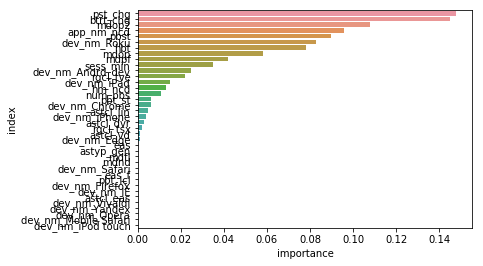

In [27]:
# Bar Chart
Feature_Importance_chart = sns.barplot(x="importance", y="index", data=feat_imp_plt)

# NOTE: Using the principle of parsimony as the simplest model with the least assumptions
#       and variables, but with greatest explanatory power--we assess the chart and in
#       future modeling iterations would look to possibly drop the bottom 50% of variables.

### Dropping features with <= 0.010 importance

In [28]:
# Dropping highly correlated features for optimized analysis
pb_final.drop(['rgcl_tsx','dev_nm_iPhone','astcl_vd','eas','pbt_st','mdfl','mdnd','dev_nm_Safari',
               'astyp_gen','dev_nm_Edge','eas_f','dev_nm_Firefox','dev_nm_IE','pbt_lcl',
               'dev_nm_iPod touch','dev_nm_Opera','astcl_eas','dev_nm_Vivaldi','dev_nm_Yandex',
               'dev_nm_Mobile Safari'], axis=1, inplace=True)
pb_final.head()

,buff_flg,sess_min,app_nm_ncd,num_pbs,hm_ncd,btrt_chg,pst_chg,pbst,hbt,mdop,mdop2,mdpf,astcl_lin,astcl_dvr,rgcl_tve,dev_nm_Andrd_dev,dev_nm_Chrome,dev_nm_Roku,dev_nm_iPad
0,1,242,1,3.0,-1,1,1,1,1,1,1,1,0,0,1,1,0,0,0
1,0,0,1,0.0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0.0,-1,1,1,1,1,1,1,1,0,0,1,1,0,0,0
3,1,1,1,0.0,-1,1,1,1,1,1,1,1,1,0,1,1,0,0,0
4,1,1,1,0.0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0


In [29]:
# Create X and y and reassign to new Feature Selection table reduciton

# X = Remove y from PredBuff 
X_pb2 = pb_final.drop(['buff_flg'], axis=1)

# y = Remove X from PredBuff by selecting the buffer_flag column
y_pb2 = pb_final['buff_flg']

# Applying Train, Test, Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pb2, y_pb2, random_state=321)

### Re-running Model 2 to assess performance improvement

In [30]:
# Random forest with max depth adjusted
rf2 = RandomForestClassifier(n_estimators=150, random_state=321, max_depth=4,)
rf2.fit(X_train2, y_train2)

print("\nRandom Forest Classifier train score: {:.3f}".format(rf2.score(X_train2, y_train2)))
print("Random Forest Classifier test score: {:.3f}".format(rf2.score(X_test2, y_test2)))


# NOTE: Some improvement fit when adjusting Max depth, tried different values until closest fit 
#       was made with test slghtly lower than train. (If test was much lower than train we would 
#       be underfitting.) Removing additional low-importance variables appears to have improved 
#       the mode slighly from the first run of Random Forest. 


Random Forest Classifier train score: 0.855
Random Forest Classifier test score: 0.856


AUC: 0.943


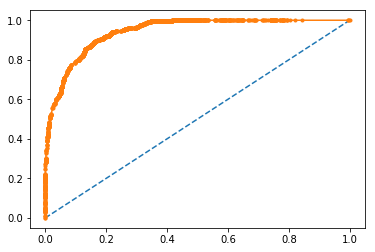

In [31]:
# Apply AUC metric from ROC curves
rf2.fit(X_train2, y_train2)
# predict probabilities
probs = rf2.predict_proba(X_test2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test2, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test2, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# NOTE: Removing the lower 50% of low importance variables improves the AUC curve slightly

# Model 3 - Gradient Boosting Classifier

In [32]:
# Testing different GBRT (Gradient Boosting Regression Trees) hyperparmeters

# Gradient Boosting Classifier - Default hyperparameters
gbrt=GradientBoostingClassifier(random_state=321)
gbrt.fit(X_train2, y_train2)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test2, y_test2)))

# Gradient Boosting Classifier - Additional hyperparameters - learning_rate
gbrt=GradientBoostingClassifier(random_state=321, learning_rate=0.01)
gbrt.fit(X_train2, y_train2)
print("\nAccuracy on training set w/learning rate: {:.3f}".format(gbrt.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test2, y_test2)))

# Gradient Boosting Classifier - Additional hyperparameters - n estimators
gbrt=GradientBoostingClassifier(random_state=321, n_estimators=200, learning_rate=0.03)
gbrt.fit(X_train2, y_train2)
print("\nAccuracy on training set w/n_estimators: {:.3f}".format(gbrt.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test2, y_test2)))

# Gradient Boosting Classifier - Additional hyperparameters - loss exponential
gbrt=GradientBoostingClassifier(random_state=321, loss='exponential')
gbrt.fit(X_train2, y_train2)
print("\nAccuracy on training set w/loss exponential: {:.3f}".format(gbrt.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test2, y_test2)))

# NOTE: Adding and adjusting hyperparmeters beyond the default does not appear to improve model
#       Traing and test are close and showing model stability

Accuracy on training set: 0.884
Accuracy on test set: 0.883

Accuracy on training set w/learning rate: 0.854
Accuracy on test set: 0.857

Accuracy on training set w/n_estimators: 0.876
Accuracy on test set: 0.875

Accuracy on training set w/loss exponential: 0.882
Accuracy on test set: 0.880


### Apply Grid Search for-loop with Gradient Boosting Classifier

In [33]:
# Apply simple Grid Search for hyperparmaeter tuning for GBRT
 
print("Size of training set: {}".format(
        X_train2.shape[0], X_test2.shape[0]))
best_score=0
for n_estimators in range (50, 200, 50):
    for learning_rate in [0.01, 0.02, 0.03, 0.04]:
        # for each combination of parameters, train a model
        gbrt = GradientBoostingClassifier(n_estimators=n_estimators, 
                                          learning_rate=learning_rate)
        # fit to the training data
        gbrt.fit(X_train2, y_train2)
        # evaluate the fit model on the test set)
        score = gbrt.score(X_test2, y_test2)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_estimators':n_estimators, 
                               'learning_rate':learning_rate}

print("Best score: {:.3f}".format(best_score))
print("best parameters: {}".format(best_parameters))

# NOTE: Applying Grid Search to the model does come up with slightly different parmeter tuning 
#       than our manual approach above, but does not increase model accuacy.

Size of training set: 60000
Best score: 0.875
best parameters: {'n_estimators': 150, 'learning_rate': 0.04}


# Model Comps - F1, Confusion Matrix, Class Reports

### Predictions

In [34]:
# Model 1 - Logistic Regression
logreg_pb2 = LogisticRegression(C=1.0, random_state=321)
logreg_pb2.fit(X_train2, y_train2)
print("\nLogistic Regression Pred score: {:.3f}".format(logreg_pb2.score(X_test2, y_test2)))

# Model 2 - Random Forest Classifier
print("\nRandom Forest Classifier Pred score: {:.3f}".format(rf2.score(X_test2, y_test2)))

# Model 3 - Gradient Boosting Classifier - substiting optimal hyperparameters from grid search
gbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.04)
gbrt.fit(X_train2, y_train2)
print("\nGradient Boosting Classifier Pred score: {:.3f}".format(gbrt.score(X_test2, y_test2)))

# NOTE: As expected, the GBM Gradient Boosting Classifier scores the highest, but only marginally
#       more than the Random Forest Classifier


Logistic Regression Pred score: 0.855

Random Forest Classifier Pred score: 0.856

Gradient Boosting Classifier Pred score: 0.873


### F1 Scores

In [35]:
# Model 1 - Logistic Regression
pred_logreg = logreg_pb2.predict(X_test2)
print("\nf1 Score Logistic Regression: {:.3f}".format(
        f1_score(y_test2, pred_logreg)))

# Model 2 - Random Forest Classifier
pred_rfc = rf2.predict(X_test2)
print("\nf1 Score Random Forest Classifier: {:.3f}".format(
        f1_score(y_test2, pred_rfc)))

# Model 3 - Gradient Boosting Classifier
pred_gbrt = gbrt.predict(X_test2)
print("\nf1 Score Gradient Boosting Classifier: {:.3f}".format(
        f1_score(y_test2, pred_gbrt)))

# NOTE: Directionally the models are showing the same as the predictions where GBC is the best


f1 Score Logistic Regression: 0.831

f1 Score Random Forest Classifier: 0.840

f1 Score Gradient Boosting Classifier: 0.853


### Confusion Matrix


Logistic Regression Confusion matrix:
[[9987 1631]
 [1266 7116]]

Random Forest Classifier Confusion matrix:
[[9592 2026]
 [ 848 7534]]

Gradient Boosting Classifier matrix:
[[10074  1544]
 [ 1003  7379]]


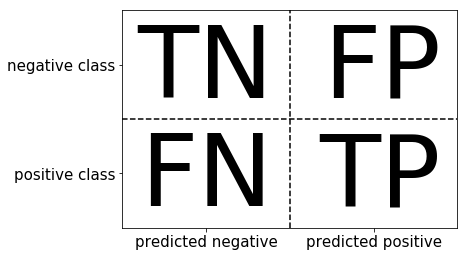

In [36]:
mglearn.plots.plot_binary_confusion_matrix()

# Model 1 - Logistic Regression
confusion = confusion_matrix(y_test2, pred_logreg)
print("\nLogistic Regression Confusion matrix:\n{}".format(confusion))

# Model 2 - Random Forest Classifier
confusion = confusion_matrix(y_test2, pred_rfc)
print("\nRandom Forest Classifier Confusion matrix:\n{}".format(confusion))

# Model 3 - Gradient Boosting Classifier
confusion = confusion_matrix(y_test2, pred_gbrt)
print("\nGradient Boosting Classifier matrix:\n{}".format(confusion))

# NOTE: For the most performant model GBM / GBC True Neg 'Not Buffer' = 10074, 
#       True Pos 'Buffer' = 7379 indicating the GBC model did well with classifying TN/TP
#       with more TP and TN and fewer FP and FN this indicates proper classification
# NOTE: 7340 shows GBM is directionally the highest again compared to other models and 
#       predicted of the positive cases occurring, then predicts positive results
#       TP = Correctly predicted Buffer event occurred
#       TN = Correctly predicted Buffer event did not occur
#       FP = Incorrectly predicted Buffer event occurred
#       FN = Incorrectly predicted Buffer event did not occur

### Classification Reports

In [37]:
# Model 1 - Logistic Regression
print("\nLogistic Regression matrix:")
print(classification_report(y_test2, pred_logreg, target_names=["Buffer", "Not Buffer"]))

# Model 2 - Random Forest Classifier
print("\nRandom Forest Classifier matrix:")
print(classification_report(y_test2, pred_rfc, target_names=["Buffer", "Not Buffer"]))

# Model 3 - Gradient Boosting Classifier
print("\nGradient Boosting Classifier matrix:")
print(classification_report(y_test2, pred_gbrt, target_names=["Buffer", "Not Buffer"]))

# NOTE:
#       TP = Correctly predicted Buffer event occurred 
#           (Buffer event did happen and model said it did)
#       TN = Correctly predicted Buffer event did not occur 
#           (Buffer event did not happen and model said it didn't)
#       FP = Incorrectly predicted Buffer event occurred 
#           (Buffer event did not happen when model said it did)
#       FN = Incorrectly predicted Buffer event did not occur 
#            (Buffer event happened when model said it didn't)

# NOTE: * Precision reinforces that goal of reduced FPs for Buffer is good as we want to reduce 
#         the times we incorrectly predict the Buffer event occurred and erroneously throttle bandwidth.
#       * Recall indicates that FNs for Buffer mean there is an issue with the video and didn't
#         throttle bandwidth when we needed to.
#       * F1-score a harmonic mean of precision and recall, indicates overall balance for the tradeoff
#         between making sure we only fix the problems we need to such as throttling bandwidth while 
#         fixing the highest number of buffer events when throttling as possible.
#       * Based on the F1 scores it appears as though the Gradient Boosting Classifier is the model
#         we should choose


Logistic Regression matrix:
              precision    recall  f1-score   support

      Buffer       0.89      0.86      0.87     11618
  Not Buffer       0.81      0.85      0.83      8382

   micro avg       0.86      0.86      0.86     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.86      0.86      0.86     20000


Random Forest Classifier matrix:
              precision    recall  f1-score   support

      Buffer       0.92      0.83      0.87     11618
  Not Buffer       0.79      0.90      0.84      8382

   micro avg       0.86      0.86      0.86     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.86      0.86      0.86     20000


Gradient Boosting Classifier matrix:
              precision    recall  f1-score   support

      Buffer       0.91      0.87      0.89     11618
  Not Buffer       0.83      0.88      0.85      8382

   micro avg       0.87      0.87      0.87     20000
   macro avg       0.87    